# Chapter 1: Missing Exercise from First Workshop

5. Show that given the loss function, $L(\theta, a) = |\theta - a|$, then $\delta(y)$ is the median.

$$
\begin{align}
L(\theta, a) & = |\theta - a|\\
R(a) & = \int_{\Omega} |\theta - a|\pi(\theta|y)d\theta\\
& = \int_{-\infty}^a(a - \theta)\pi(\theta|y)d\theta + \int_a^{\infty}(\theta - a)\pi(\theta|y)d\theta
\end{align}
$$

First order criterion:

$$
\begin{align}
\frac{\partial R}{\partial a} & = \int_{-\infty}^{a}\pi(\theta|y)d\theta - \int_a^{\infty}\pi(\theta|y)d\theta \\
& = \int_{-\infty}^{a}\pi(\theta|y)d\theta - \int_a^{\infty}\pi(\theta|y)d\theta + \int_a^{\infty}\pi(\theta|y)d\theta - \int_a^{\infty}\pi(\theta|y)d\theta \\
& = 1 - 2\int_a^{\infty}\pi(\theta|y)d\theta
\end{align}
$$

$$
\begin{align}
1 - 2\int_a^{\infty}\pi(\theta|y)d\theta & = 0 \\
\int_a^{\infty}\pi(\theta|y)d\theta & = \frac{1}{2} \\
1 - \int_a^{\infty}\pi(\theta|y)d\theta & = \frac{1}{2}
\end{align}
$$

$$
1 - P(\theta \leq a) = \frac{1}{2} \rightarrow P(\theta \leq a) = \frac{1}{2}
$$

# Chapter 4: Exercises

2. Given a random sample $y = [y_1, y_2, ..., y_N]^T$ from a *binomial distribution* where the number of trials ($n$) is known. Show that $p(y|\theta)$ is in the exponential family, and find the posterior distribution, the marginal likelihood and the predictive distribution of the binomial-beta model assuming the number of trials is known.

2.1 Binomial distirbution comes from the exponential family

$$
\begin{aligned}
p(y | p) & =\left(\begin{array}{l}
n \\
y
\end{array}\right) p^y(1-p)^{n-y}\\
&=\left(\begin{array}{l}
n \\
y
\end{array}\right)(1-p)^n\left(\frac{\rho}{1-p}\right)^y\\
&=\underbrace{\left(\begin{array}{l}
n \\
y
\end{array}\right)}_{h(y)} \underbrace{(1-p)^n}_{C(p)} \exp \{\underbrace{y}_{T_{(y)}} \underbrace{\log \frac{p}{1-p}}_{\eta(p)}\}
\end{aligned}
$$



$$
\begin{aligned}
p(\vec{y}, p) & =\prod_{i=1}^N\left(\begin{array}{l}
n \\
y
\end{array}\right) p^{y_i}(1-p)^{n-y_i}\\
&=\prod_{i=1}^N\left(\begin{array}{l}
n \\
y
\end{array}\right)\left(\frac{p}{1-p}\right)^{y_i}(1-\rho)^n\\
&=\left[\prod_{i=1}^N\left(\begin{array}{l}
n \\
y
\end{array}\right)\right]\left[(1-p)^n\right]^N\left[\prod_{i=1}^N \exp \left\{y_i \log \frac{p}{1-p}\right\}\right]\\
&=\underbrace{\left[\prod_{i=1}^N\left(\begin{array}{l}
n \\
y
\end{array}\right)\right]}_{h(\vec{y})} \underbrace{\left[(1-p)^n\right]^N}_{C^N(p)} \exp \{\underbrace{\sum_{i=1}^Ny_i \log \frac{p}{1-p}}_{\exp \left\{T(y) \cdot \eta(p)\}\right)}  \}
\end{aligned}
$$

2.2 Posterior distribution of Binomial-Beta

$$
\begin{aligned}
&p(y| p) \sim  \text {Bin}(p) \rightarrow n \text { known} \rightarrow \text {n fixed}\\
&\pi(p) \sim \operatorname{Beta} \left(\alpha_0, \beta_0\right)\\
\pi(p \mid \vec{y}) & \propto p(\vec{y} \mid p) \times \pi(p)\\
&=\prod_{i=1}^N\left(\begin{array}{l}
n \\
y_i
\end{array}\right) p^{y_i}(1-p)^{n-y_i} \times \frac{p^{\alpha_0-1}(1-p)^{\beta_0-1}}{B\left(\alpha_0, \beta_0\right)} \\
& \propto\left[\prod_{i = 1}^N\left(\begin{array}{l}
n \\
y_i
\end{array}\right) \right] p^{\sum_i y_i+\alpha_0-1}(1 - p)^{n N-\sum_i y_i+\beta_0-1} \\
& \propto p^{\sum_i y_i + \alpha_0 - 1} (1 - p)^{nN - \sum_i y_i + \beta_0 - 1} \sim Beta(\alpha_n, \beta_n)
\end{aligned}
$$

$$
\alpha_n=\sum_{i=1}^N y_i+\alpha_0 \quad \beta_n=n N-\sum_{i=1}^N y_i+\beta_0
$$


2.3 Marginal Likelihood of Binomial-Beta

$$
\begin{aligned}
p(y) & =\int_0^L p(\vec{y} \mid p) \pi(p) d p\\
& = \frac{\prod_{i=1}^N\left(\begin{array}{l}
n \\
y_i
\end{array}\right)}{\beta\left(\alpha_0, \beta_0\right)} \int_0^1 p^{\sum_{i=1}^N y_i+\alpha_0 - 1}(1-p)^{n N-\sum_{i=1}^N y_i+\beta_0-1} dp\\
&=\frac{\prod_{i=1}^N\left(\begin{array}{l}
n \\
y_i
\end{array}\right)}{\beta\left(\alpha_0, \beta_0\right)} \int_0^1 p^{\alpha_n-1}(1-p)^{\beta_n-1} dp \\
& = \frac{\prod_{i=1}^N\left(\begin{array}{l}
n \\
y_i
\end{array}\right) B(\alpha_n, \beta_n)}{\beta\left(\alpha_0, \beta_0\right)}
\end{aligned}
$$

2.4 Predictive distribution of Binomial-Beta

$$
\begin{aligned}
\pi\left(Y_0 \mid \vec{y}\right) & =\int_0^{1} p\left(Y_0 \mid y, p\right) \pi(p \mid y) dp\\
& = \frac{\left(\begin{array}{l}
n \\
Y_0
\end{array}\right)}{B\left(\alpha_{n} \beta_n\right)} \int_0^{1}  p^{Y_0}(1-p)^{n - Y_0}p^{\alpha_n - 1}(1-p)^{\beta_n - 1} dp\\
&=\frac{\left(\begin{array}{l}
n \\
Y_0
\end{array}\right)}{B\left(\alpha_{n} \beta_n\right)} \int_0^{1} p^{Y_0+\alpha_n-1}\left(1- p)^{n-Y_0+\beta_n-1} d \rho\right. \\
& = \frac{\left(\begin{array}{l}
n \\
Y_0
\end{array}\right)B(Y_0 + \alpha_n, n - Y_0 + \beta_n)}{B\left(\alpha_{n} \beta_n\right)}
\end{aligned}
$$

3. Given a random sample $y = [y_1, y_2, ..., y_N]^T$ from a exponential distribution. Show that $p(y|\lambda)$ is in the exponential family, and find the posterior distribution, marginal likelihood and predictive distribution of the exponential-gamma model.

3.1 Exponential distribution comes from the exponential family:

$$
p(y | \lambda) = \lambda exp\{-\lambda y \}
$$

$$
h(y) = I_y\{y \geq 0\}, \quad C(\lambda) = \lambda, \quad T(y) = y, \quad \eta(\lambda) = -\lambda
$$

$$
\begin{align}
p(\vec{y}|\lambda) & = \prod_{i=1}^N\lambda exp\{-\lambda y_i\}\\
& = \lambda^N exp\{-\lambda\sum_i y_i\}
\end{align}
$$

$$
h(\vec{y}) = I_{\vec{y}}\{\vec{y} \geq 0 \}, \quad C^N(\lambda) = \lambda^N, \quad \eta(\lambda) = -\lambda, \quad T(y) = \sum_{i = 1}^Ny_i
$$

3.2 Posterior distribution of Exponential-Gamma:

$$
\begin{align}
p(\vec{y}|\lambda) & \sim exp(\lambda)
\pi(\lambda) & \sim Gamma(\alpha_0, \beta_0)
\end{align}
$$

$$
\begin{align}
p(\lambda | \vec{y}) &  \propto \lambda^N exp\{-\lambda \sum_i y_i\}\frac{\beta_0^{\alpha_0}}{\gamma(\alpha_0)} \lambda^{\alpha_0 - 1} exp\{-\beta_0 \lambda\} \\
& \propto \lambda^{N + \alpha_0 - 1} exp\{-\lambda(\sum_i y_i + \beta_0)\} \\
& \sim Gamma(\alpha_n, \beta_n)
\end{align}
$$

$$
\alpha_n = N + \alpha_0, \quad \beta_n = \sum_{i = 1}^{N} y_i + \beta_0
$$

3.3 Marginal Likelihood of Exponential-Gammma:

$$
\begin{align}
p(\vec{y}) & = \int_0^{\infty} p(\vec{y}|\lambda)\pi(\lambda)d\lambda \\
& = \frac{\beta_0^{\alpha_0}}{\gamma(\alpha_0)} \int_0^{\infty} \lambda^N exp\{-\lambda\sum_i y_i\} \lambda^{\alpha_0 - 1} exp\{-\lambda\beta_0\} d\lambda \\
& =  \frac{\beta_0^{\alpha_0}}{\gamma(\alpha_0)} \int_0^{\infty} \lambda^{N + \alpha_0 - 1} exp\{-\lambda (\sum_i y_i + \beta_0)\} d\lambda \\
& = \frac{\beta_0^{\alpha_0}\gamma(\alpha_n)}{\gamma(\alpha_0)\beta_n^{\alpha_n}}
\end{align}
$$

3.4 Predictive distribution of Exponential-Gamma:

$$
\begin{align}
\pi(Y_0 | \vec{y}) & = \\int_0^{\infty} p(Y_0||\lambda, y) \pi(\lambda | \vec{y}) d\lambda \\
& = \frac{\beta_n^{\alpha_n}}{\gamma(\alpha_n)} \int_0^{\infty} \lambda exp\{-\lambda Y_0\} \lambda^{\alpha_n - 1} exp\{-\beta_n \lambda\} d\lambda \\
& = \frac{\beta_n^{\alpha_n}}{\gamma(\alpha_n)} \int_0^{\infty} \lambda^{(\alpha_n + 1) - 1} exp\{-\lambda (\beta_n + Y_0)\} \\
& = \frac{\beta_n^{\alpha_n}\gamma(\alpha_n + 1)}{\gamma(\alpha_n)(\beta_n + Y_0)^{\alpha_n + 1}}
\end{align}
$$

4. Find the marginal likelihood in the normal/inverse-Wishart model.

# FALTA

6. Show that in the linear regression model $\beta_n^{\top}(B_n^{-1} - B_n^{-1}M^{-1}B_n^{-1})\beta_n = \beta_{**}^{\top}C\beta_{**}$ and $\beta_{**} = X_0\beta_n$.

Firstly...
$$
\begin{equation}
\begin{split}
\beta_n^{\top}(B_n^{-1} - B_n^{-1}M^{-1}B_n^{-1})\beta_n & = \beta_n^{\top}\left(B_n^{-1}-B_n^{-1}\left[B_n - B_n X_0^{\top} C X_0 B_n\right] B_n^{-1}\right) \beta_n \\
& = \beta_n^{\top}\left(B_n^{-1}-\left[I_K - X_0^{\top} C X_0 B_n\right] B_n^{-1}\right) \beta_n \\
& = \beta_n^{\top}\left(B_n^{-1}-B_n^{-1}+X_0^{\top} C X_0\right) \beta_n \\
& = \beta_n^{\top} X_0^{\top} C X_0 \beta_n \\
& = \beta_{**}^{\top} C \beta_{**} \\
\end{split}
\end{equation}
$$

Secondly...

$$
\begin{aligned}
&\beta_{**}=C^{-1} X_0 M^{-1} B_n^{-1} \beta_n\\
&=\left(I_{N_0}+X_0 B_n X_0^{\top}\right) X_0\left(B_n-B_n X_0^{\top} C X_0 B_n\right) B_n^{-1} \beta_n\\
&=\left(I_{N_0}+X_0 B_n X_0^{\top}\right) X_0\left(\beta_n-B_n X_0^{\top} C X_0 \beta_n\right)\\
&=\left(X_0+X_0 B_n X_0^{\top} X_0\right)\left(\beta_n-B_n X_0^{\top} C X_0 \beta_n\right)\\
&=X_0 \beta_n+\underbrace{X_0 B_n X_0^{\top} X_0 \beta_n - X_0 B_n X_0^{\top} C X_0 \beta_n - X_0 B_n X_0^{\top} X_0 B_n X_0^{\top} C X_0 \beta_n}_{\text {We want to see that this is  zero}}\\
&X_0 B_n X_0^{\top}\left(X_0 \beta_n-C X_0 \beta_n-X_0 B_n X_0^{\top} C X_0 \beta_n\right)=0\\
&X_0 B_n X_0^{\top}\left(I_{N_0}-C-X_0 B_n X_0^{\top} C\right) X_0 \beta_n=0\\
&X_0 B_n X_0^{\top}\left(I_{N_0}-\left(X_0 B_n X_0^{\top}+I_{N_0}\right) C\right) X_0 \beta_n=0\\
&X_0 B_n X_0^{\top}\left(I_{N_0}-C^{-1} C\right) X_0 \beta_n=0\\
&X_0 \beta_n X_0^{\top}\left(I_{N_0}-I_{N_0}\right) X_0 \beta_n=0
\end{aligned}
$$
$$
\beta_{**} = X_0 \beta_n
$$

# Greenberg's Introduction to Bayesian Econometrics Exercises

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

5.1 Use the probability integral transformation method to simulate from the distribution

$$
f(x) = \left\{
    \begin{array}{lr}
        \frac{2}{a^2}x, & \text{ if } 0 \leq x \leq a\\
        0, & \text{ otherwise}
    \end{array}
\right\}
$$

where $a \geq 0$ . Set a value for $a$, simulate various sample sizes, and compare results to
the true distribution.

c:\Users\danie\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


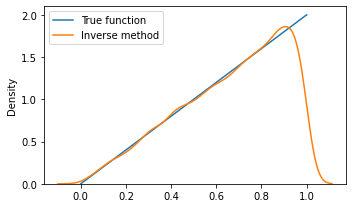

In [7]:
N_SAMPLES = 10000
upper_bound = 1

uniform_samples = np.random.uniform(size=N_SAMPLES)
function_sample_space = np.linspace(0, upper_bound, N_SAMPLES)
function_values = 2 *  function_sample_space / (upper_bound ** 2)
inverse_method_function_values = upper_bound * np.sqrt(uniform_samples)

plt.figure(figsize=(5, 3))
plt.plot(function_sample_space, function_values, label='True function')
sns.distplot(inverse_method_function_values, hist=False, label='Inverse method')
plt.legend()
plt.tight_layout()
plt.show()

5.2 Use the probability integral transformation method to simulate 500 values from the
logistic distribution,

$$
f(x) = \frac{e^{-x}}{(1 + e^{-x})^2}, \quad -\infty < x < \infty
$$

Compare your simulated values to the true distribution. Explore how the simulation
improves with larger sample sizes. Generalize your result to the general form of the
distribution,

$$
f(x) = \frac{exp\{-(x - \alpha)/\beta\}}{\beta(1 + exp\{-(x - \alpha)/\beta\})^2}, \quad -\infty < x < \infty, \quad \alpha, \beta > 0
$$

c:\Users\danie\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


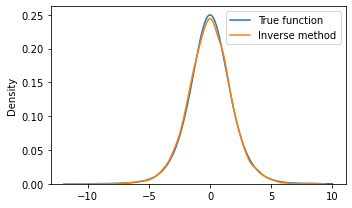

In [16]:
N_SAMPLES = 10000
bound = 10

def logistic_function(x):
    return np.exp(-x) / (1 + np.exp(-x)) ** 2

uniform_samples = np.random.uniform(size=N_SAMPLES)
function_sample_space = np.linspace(-bound, bound, N_SAMPLES)
function_values = logistic_function(function_sample_space)
inverse_method_function_values = - np.log((1 - uniform_samples) / uniform_samples)

plt.figure(figsize=(5, 3))
plt.plot(function_sample_space, function_values, label='True function')
sns.distplot(inverse_method_function_values, hist=False, label='Inverse method')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\danie\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


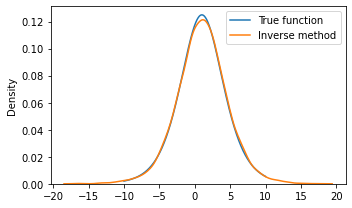

In [18]:
N_SAMPLES = 10000
bound = 10
alpha = 1
beta = 2

uniform_samples = np.random.uniform(size=N_SAMPLES)
function_sample_space = np.linspace(-bound, bound, N_SAMPLES)
transformed_sample_space = (function_sample_space - alpha) / beta
function_values = logistic_function(transformed_sample_space) / beta
inverse_method_function_values = - np.log((1 - uniform_samples) / uniform_samples) * beta + alpha

plt.figure(figsize=(5, 3))
plt.plot(function_sample_space, function_values, label='True function')
sns.distplot(inverse_method_function_values, hist=False, label='Inverse method')
plt.legend()
plt.tight_layout()
plt.show()

5.3 Generate samples from the distribution

$$
f(x) = \frac{2}{3} 2e^{-2x} + 2 e^{-3x}
$$

using the finite mixture approach. Hint: Note that the p.d.f. can be written as

$$
f(x) = \frac{1}{3} (2e^{-2x}) + \frac{2}{3}(3 e^{-3x})
$$

c:\Users\danie\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


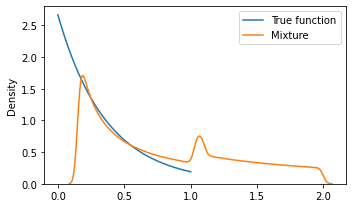

In [10]:
N_SAMPLES = 10000000
bound = 1

def first_exponential(x):
    return 2 * np.exp(-2 * x)

def second_expoenential(x):
    return 3 * np.exp(-3 * x)

sample_space = np.linspace(0, bound, N_SAMPLES)
function_values = first_exponential(sample_space) / 3 + second_expoenential(sample_space) * 2 / 3

uniform_samples = np.random.uniform(size=N_SAMPLES)
mixture_samples = np.where(uniform_samples < 1 / 3, first_exponential(uniform_samples) , second_expoenential(uniform_samples))

plt.figure(figsize=(5, 3))
plt.plot(sample_space, function_values, label='True function')
sns.distplot(mixture_samples, hist=False, label='Mixture')
plt.legend()
plt.tight_layout()

# FALTA

7.3 Construct a Gibbs algorithm to analyze the Poisson model with unknown switch point.
Given the specification in Equations (7.3) and (7.4), show that

$$
\pi(\theta_1, \theta_2, k | y) \propto \theta_1^{\alpha_{10} - 1}e^{\beta_{10}\theta_1} \theta_2^{\alpha_{20} - 1} e^{-\beta_{20}\theta_2} \prod_{i=1}^{k}e^{-\theta_1}\theta_1^{y_i} \prod_{i = k + 1}^n e^{\theta_2}\theta_2^{y_i}
$$

and verify that

$$
\begin{align}
& \theta_1 | y, k \sim G(\alpha_10 + \sum_1^k y_i, \beta_10 + k), \\
& \theta_2 | y, k \sim G(\alpha_20 + \sum_1^k y_i, \beta_20 + n - k), \\
& \pi(k|y, \theta_1, \theta_2) = \frac{e^{k(\theta_2 - \theta_1)}(\theta_1/\theta_2)^{\sum_1^k y_i}}{\sum_{k = 1}^{n} e^{k(\theta_2 - \theta_1)}(\theta_1/\theta_2)^{\sum_1^k y_i}}
\end{align}
$$

Apply your algorithm to the mining disaster data analyzed by Carlin et al. (1992a);
the data may be found in the article. Your analysis should generate marginal posterior
distributions for $\theta_1$, $\theta_2$, $p(k)$, and the marginal likelihood computed by the method
of Chib (1995). For simplicity, set $\alpha_10 = \alpha_20 = 0.5$ and $\beta_10 = \beta_20 = 1.0$. (Curiously,
although these data have been analyzed from the Bayesian viewpoint in several papers,
none of them present historical material that might shed light on when changes in
parameters took place. For example, changes in government regulation, technology,
or the location of mines might be expected to affect the probability of a disaster. A
more general version of the model permits multiple switch points if necessary.)